In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Read dictionary file

df_dict = pd.read_csv('candy_data_dictionary.csv', index_col=0)  
print (df_dict)

                                                        Description
Field                                                              
competitorname                                The name of the candy
chocolate                                Does it contain chocolate?
fruity                                        Is it fruit flavored?
caramel                              Is there caramel in the candy?
peanutalmondy     Does it contain peanuts, peanut butter or almo...
nougat                                      Does it contain nougat?
crispedricewafer  Does it contain crisped rice, wafers, or a coo...
hard                                            Is it a hard candy?
bar                                              Is it a candy bar?
pluribus                 Is it one of many candies in a bag or box?
sugarpercent      The percentile of sugar it falls under within ...
pricepercent      The unit price percentile compared to the rest...
winpercent        The overall win percentage acc

In [3]:
# Read data file

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

# Top 15 
#
# top 15 =   14 chocolate
#             1 fruity

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050


In [4]:
# Find emty cells (none)

# print (df_data[df_data.isna().any(axis=1)])

# This is not candy (all 0 attributes)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

# Show datatypes

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         83 non-null     int64  
 1   fruity            83 non-null     int64  
 2   caramel           83 non-null     int64  
 3   peanutyalmondy    83 non-null     int64  
 4   nougat            83 non-null     int64  
 5   crispedricewafer  83 non-null     int64  
 6   hard              83 non-null     int64  
 7   bar               83 non-null     int64  
 8   pluribus          83 non-null     int64  
 9   sugarpercent      83 non-null     float64
 10  pricepercent      83 non-null     float64
 11  winpercent        83 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.4+ KB


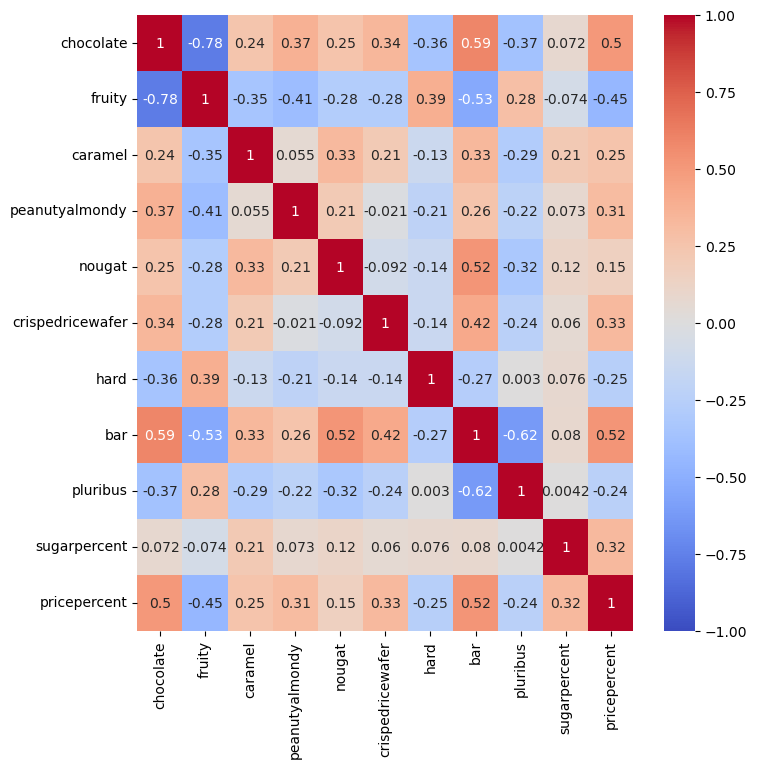

In [5]:
# Correlation between attributes

# view the correlations between the available types of candy (no winpercent used for this graph)
# 
# Didn't use: df_temp = df_data.iloc[:, 0:-1].multiply(df_data["winpercent"], axis="index")

df_temp = df_data.iloc[:, 0:-1]

correlation = df_temp.corr().round(decimals=12)
plt.figure(figsize=(8, 8))

heatmap=sns.heatmap(correlation, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

fig = heatmap.get_figure()
fig.savefig('correlation.png', dpi=fig.dpi)

# red =  perfect positive correlation
# blue = perfect negative correlation


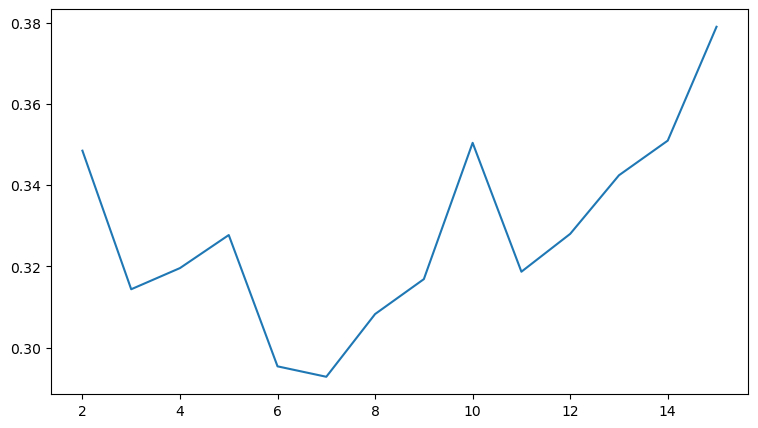

In [6]:
# there are similar objects (candy) and I want to group them based on the features.

# K-Means clustering is an unsupervised machine learning technique that is used to group similar objects together in data.

# https://www.datacamp.com/tutorial/k-means-clustering-python

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# the latest column (winpercent) isn't a candy feature 
df_temp = df_data.iloc[:, 0:11]

df_prep = preprocessing.normalize(df_temp)

K = range(2, 16)
fits = []
score = []

plt.figure(figsize=(9, 5))

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(df_prep)
    fits.append(model)
    score.append(silhouette_score(df_prep, model.labels_, metric='euclidean'))

performance=sns.lineplot(x = K, y = score)

fig = performance.get_figure()
fig.savefig('performance.png', dpi=fig.dpi)
    

In [7]:
# Add the groups to the dataframe

df_data['groupby_2'] = pd.Series(fits[0].labels_, index=df_temp.index)
df_data['groupby_3'] = pd.Series(fits[1].labels_, index=df_temp.index)
df_data['groupby_4'] = pd.Series(fits[2].labels_, index=df_temp.index)
df_data['groupby_5'] = pd.Series(fits[3].labels_, index=df_temp.index)
df_data['groupby_6'] = pd.Series(fits[4].labels_, index=df_temp.index)
df_data['groupby_7'] = pd.Series(fits[5].labels_, index=df_temp.index)
df_data['groupby_8'] = pd.Series(fits[6].labels_, index=df_temp.index)
df_data['groupby_9'] = pd.Series(fits[7].labels_, index=df_temp.index)

df_data.to_excel('candy_data_cluster.xlsx')  

df_data.head (10)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,groupby_2,groupby_3,groupby_4,groupby_5,groupby_6,groupby_7,groupby_8,groupby_9
competitorname,,,,,,,,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0,0,3,3,3,3,4,4
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0,0,3,3,3,3,7,7
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1,1,1,1,1,1,1,1
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,0,0,3,3,3,3,3,3
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,0,0,3,3,5,5,3,3
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0,2,0,0,0,0,0,0
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,1,2,2,2,2,6,0,8
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,1,1,1,4,4,4,5,5
Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037,0,0,3,3,3,3,7,7


In [8]:
# based on 3 groups (groupby_1) :
# df_data[df_data['fits_1']==0].sort_values(by=['winpercent'], ascending=False).head(10)
# df_data[df_data['fits_1']==1].sort_values(by=['winpercent'], ascending=False).head(10)
# df_data[df_data['fits_1']==2].sort_values(by=['winpercent'], ascending=False).head(10)

# Reese's Peanut Butter cup	
# Starburst	
# Lifesavers big ring gummies

#    1 Snickers 
#    2 Reese's Peanut Butter cup
#    3 Starburst

df_data.loc[df_data.groupby(["groupby_3"])["winpercent"].idxmax()].sort_values(by=['winpercent'], ascending=False)


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,groupby_2,groupby_3,groupby_4,groupby_5,groupby_6,groupby_7,groupby_8,groupby_9
competitorname,,,,,,,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0,0,0,0,0,0,3,0
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1,2,2,2,2,2,2,2
Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392,1,1,1,1,1,1,1,1


In [9]:
# optimal solution:

df_data.loc[df_data.groupby(["groupby_7"])["winpercent"].idxmax()].sort_values(by=['winpercent'], ascending=False)


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,groupby_2,groupby_3,groupby_4,groupby_5,groupby_6,groupby_7,groupby_8,groupby_9
competitorname,,,,,,,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0,0,0,0,0,0,3,0
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0,0,3,3,3,3,4,4
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,0,0,3,3,5,5,3,3
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1,2,2,2,2,2,2,2
Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.716286,0,0,0,0,0,6,0,8
Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392,1,1,1,1,1,1,1,1
Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0,1,1,4,4,4,5,5


In [10]:
# problem with this solution:
# number two and three are almost the same flavors,  winpercent will be the same people.

# Let's take a look at the '4 candy' solution:

df_data.loc[df_data.groupby(["groupby_4"])["winpercent"].idxmax()].sort_values(by=['winpercent'], ascending=False)

# This gives the following list:

#    Reese's Peanut Butter cup
#    Twix
#    Starburst


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,groupby_2,groupby_3,groupby_4,groupby_5,groupby_6,groupby_7,groupby_8,groupby_9
competitorname,,,,,,,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0,0,0,0,0,0,3,0
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0,0,3,3,3,3,4,4
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1,2,2,2,2,2,2,2
Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392,1,1,1,1,1,1,1,1


In [11]:
#
# Model: PCA
#
# Reload data ) 
#

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data.info()
df_data


<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 100 Grand to Whoppers
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         83 non-null     int64  
 1   fruity            83 non-null     int64  
 2   caramel           83 non-null     int64  
 3   peanutyalmondy    83 non-null     int64  
 4   nougat            83 non-null     int64  
 5   crispedricewafer  83 non-null     int64  
 6   hard              83 non-null     int64  
 7   bar               83 non-null     int64  
 8   pluribus          83 non-null     int64  
 9   sugarpercent      83 non-null     float64
 10  pricepercent      83 non-null     float64
 11  winpercent        83 non-null     float64
 12  type              83 non-null     object 
dtypes: float64(3), int64(9), object(1)
memory usage: 9.1+ KB


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,chocolate
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,chocolate
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,fruity
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,chocolate
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,chocolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,fruity
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,fruity
Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,fruity


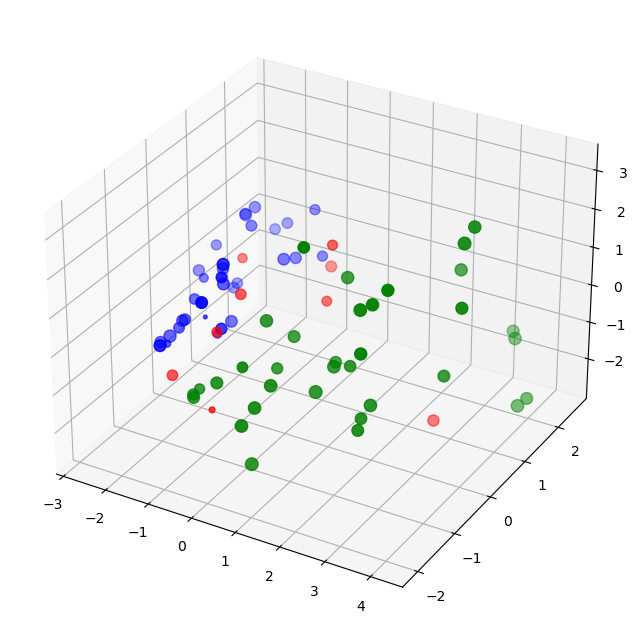

In [12]:

# NYOUG - Automated Anomalous DB Activity Detector Using Machine Learning

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent','pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=df_data['size'], lw=1, label="candy",c=df_data['color']) 
# ax.legend()
plt.show()

df_data['x'] = X_reduce[:,0]
df_data['y'] = X_reduce[:,1]
df_data['z'] = X_reduce[:,2]

# There are clusters


In [13]:

# reduce the number of candy for the first calculations
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Select the top 15 ( 5 of each)

# note: Find a better way: select, groupby and topn

df_data['top15']= 0

df_data.loc[(df_data['type'] == 'chocolate') & (df_data['winpercent'] > 76)   ,'top15'] = 1
df_data.loc[(df_data['type'] == 'fruity'   ) & (df_data['winpercent'] > 55.3) ,'top15'] = 1
df_data.loc[(df_data['type'] == 'other'    ) & (df_data['winpercent'] > 34)   ,'top15'] = 1

df_candidate = df_data.loc[(df_data['top15'] == 1)]

df_candidate.sort_values(by=['type','winpercent'], ascending=False).head(15)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,color,size,x,y,z,top15
competitorname,,,,,,,,,,,,,,,,,,,
Payday,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597,other,r,64.613398,2.651371,0.945568,-2.661264,1
Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,other,r,60.799105,-0.454481,1.787630,-0.263592,1
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,other,r,56.677160,-0.806330,-0.216530,0.560517,1
Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,other,r,56.334906,-1.464893,-1.254602,-0.891725,1
Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958,other,r,51.542055,-0.799471,-0.837735,0.102951,1
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,fruity,b,76.589181,-2.014128,-0.724737,-0.508889,1
Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,fruity,b,74.793894,-1.725870,0.340104,0.583345,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,fruity,b,73.201366,-2.168681,-0.815370,-0.735286,1
Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740,fruity,b,71.736791,-1.605951,-0.348363,0.191501,1


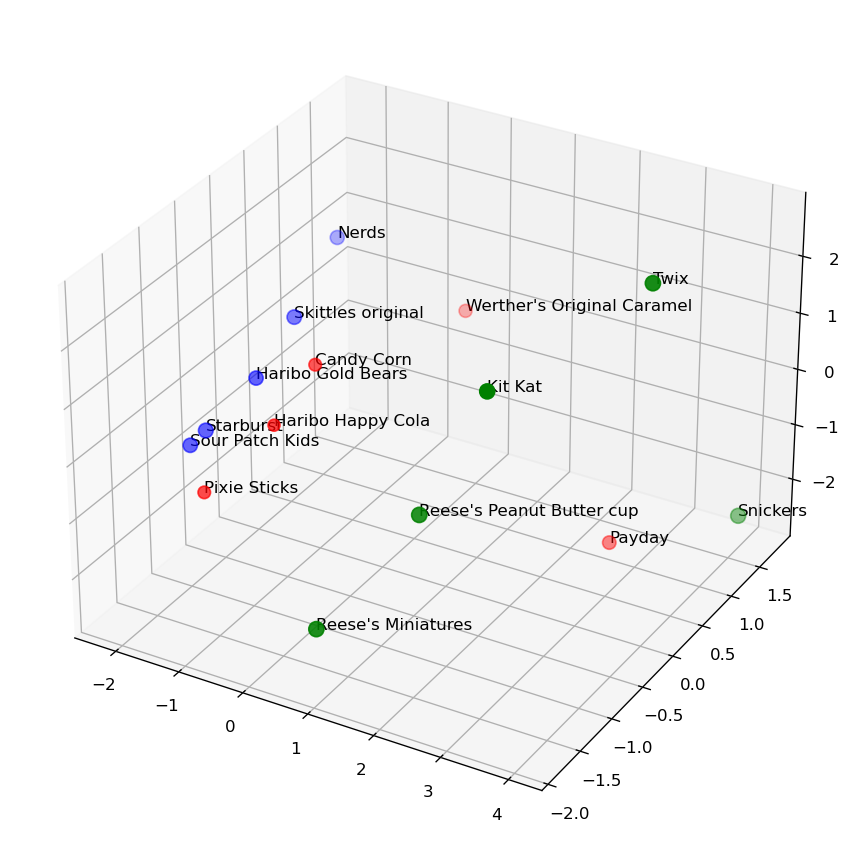

In [14]:

# only show above a percentage for each type of candy (top15)

fig = plt.figure(figsize=(16, 9), dpi=1920/16)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_candidate['x'], df_candidate['y'], zs=df_candidate['z'], s=df_candidate['size'], lw=1, label=' ',c=df_candidate['color']) 

for i, r in df_candidate.iterrows():
  x = r['x']
  y = r['y']
  z = r['z']
  s = r['size'] 
  label = i
  if s > 0:
      ax.text(x, y, z, '%s' % (label), size=10, zorder=1, color='k')

#ax.legend()
plt.show()

#fig = performance.get_figure()
fig.savefig('scatter.png', dpi=fig.dpi)
    
# other     = red
# chocolate = green
# fruity    = blue


In [ ]:
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
# from numpy.random import rand
# from IPython.display import HTML
# from matplotlib import animation

# def animate(frame):
#   ax.view_init(30, frame/2)
#   plt.pause(.001)
#   return fig

# anim = animation.FuncAnimation(fig, animate, frames=720, interval=50)
# HTML(anim.to_html5_video())


In [15]:

# create triangle area for all combinations of top 5 for each type of candy

# https://math.stackexchange.com/questions/128991/how-to-calculate-the-area-of-a-3d-triangle

def heron(a,b,c):  
    s = (a + b + c) / 2   
    area = abs(s*(s-a) * (s-b)*(s-c)) ** 0.5        
    return area

def distance3d(x1,y1,z1,x2,y2,z2):    
    a=abs(x1-x2)**2 + abs(y1-y2)**2 + abs(z1-z2)**2
    d= a ** 0.5  
    return d  

def areatriangle3d(x1,y1,z1,x2,y2,z2,x3,y3,z3):  
    a=distance3d(x1,y1,z1,x2,y2,z2)  
    b=distance3d(x2,y2,z2,x3,y3,z3)  
    c=distance3d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)  
    return A

model = []

df_chocolate = df_candidate[(df_candidate['type'] == 'chocolate')]
df_fruity    = df_candidate[(df_candidate['type'] == 'fruity')]
df_other     = df_candidate[(df_candidate['type'] == 'other')]

for ia,a in df_other.iterrows():
  for ib,b in df_fruity.iterrows():
    for ic,c in df_chocolate.iterrows():
    
      pa = np.array((a['x'],a['y'],a['z']))
      pb = np.array((b['x'],b['y'],b['z']))
      pc = np.array((c['x'],c['y'],c['z']))
    
      area = areatriangle3d (a['x'],a['y'],a['z'],b['x'],b['y'],b['z'],c['x'],c['y'],c['z'])  
    
      model.append(
         {  'other'        : ia,
            'other_win'    : a['winpercent'] ,
            'other_x'      : a['x'] ,
            'other_y'      : a['y'] ,
            'other_z'      : a['z'] ,
            'fruity'       : ib,
            'fruity_win'   : b['winpercent'] ,
            'fruity_x'     : b['x'] ,
            'fruity_y'     : b['y'] ,
            'fruity_z'     : b['z'] ,
            'chocolate'    : ic,
            'chocolate_win': c['winpercent'] ,
            'chocolate_x'  : c['x'] ,
            'chocolate_y'  : c['y'] ,
            'chocolate_z'  : c['z'] ,
            'totwin'       : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'         : area})

df_solution = pd.DataFrame(model)

df_solution[['other','other_win','fruity','fruity_win','chocolate','chocolate_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(10)

,other,other_win,fruity,fruity_win,chocolate,chocolate_win,totwin,area
59,Payday,46.296597,Nerds,55.354046,Twix,81.642914,183.293557,14.927180
69,Payday,46.296597,Sour Patch Kids,59.863998,Twix,81.642914,187.803509,14.665352
74,Payday,46.296597,Starburst,67.037628,Twix,81.642914,194.977139,14.280151
64,Payday,46.296597,Skittles original,63.085140,Twix,81.642914,191.024651,13.428560
54,Payday,46.296597,Haribo Gold Bears,57.119740,Twix,81.642914,185.059251,13.227720
55,Payday,46.296597,Nerds,55.354046,Kit Kat,76.768600,178.419243,11.762908
65,Payday,46.296597,Sour Patch Kids,59.863998,Kit Kat,76.768600,182.929195,11.214064
70,Payday,46.296597,Starburst,67.037628,Kit Kat,76.768600,190.102825,10.764290
83,Pixie Sticks,37.722336,Nerds,55.354046,Snickers,76.673782,169.750164,10.523822
84,Pixie Sticks,37.722336,Nerds,55.354046,Twix,81.642914,174.719296,10.059612


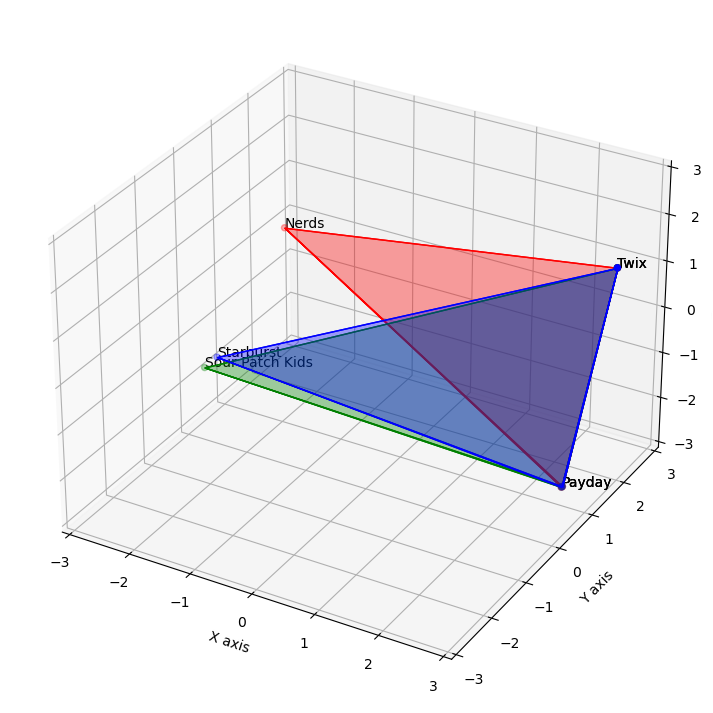

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
import math

df_triangle1=df_data.loc[['Payday','Twix','Nerds']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle2=df_data.loc[['Payday','Twix','Sour Patch Kids']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle3=df_data.loc[['Payday','Twix','Starburst']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

# rotate
xp='x'
yp='y'
zp='z'

vertices1 = np.array([
        [df_triangle1.iloc[0][xp]     ,df_triangle1.iloc[0][yp]     ,df_triangle1.iloc[0][zp]],
        [df_triangle1.iloc[1][xp]     ,df_triangle1.iloc[1][yp]     ,df_triangle1.iloc[1][zp]],
        [df_triangle1.iloc[2][xp]     ,df_triangle1.iloc[2][yp]     ,df_triangle1.iloc[2][zp]],
        [df_triangle1.iloc[0][xp]+0.01,df_triangle1.iloc[0][yp]+0.01,df_triangle1.iloc[0][zp]+0.01] 
        ])

vertices2 = np.array([
        [df_triangle2.iloc[0][xp]     ,df_triangle2.iloc[0][yp]     ,df_triangle2.iloc[0][zp]],
        [df_triangle2.iloc[1][xp]     ,df_triangle2.iloc[1][yp]     ,df_triangle2.iloc[1][zp]],
        [df_triangle2.iloc[2][xp]     ,df_triangle2.iloc[2][yp]     ,df_triangle2.iloc[2][zp]],
        [df_triangle2.iloc[0][xp]+0.01,df_triangle2.iloc[0][yp]+0.01,df_triangle2.iloc[0][zp]+0.01] 
        ])

vertices3 = np.array([
        [df_triangle3.iloc[0][xp]     ,df_triangle3.iloc[0][yp]     ,df_triangle3.iloc[0][zp]],
        [df_triangle3.iloc[1][xp]     ,df_triangle3.iloc[1][yp]     ,df_triangle3.iloc[1][zp]],
        [df_triangle3.iloc[2][xp]     ,df_triangle3.iloc[2][yp]     ,df_triangle3.iloc[2][zp]],
        [df_triangle3.iloc[0][xp]+0.01,df_triangle3.iloc[0][yp]+0.01,df_triangle3.iloc[0][zp]+0.01] 
        ])

hull1 = ConvexHull(vertices1)
hull2 = ConvexHull(vertices2)
hull3 = ConvexHull(vertices3)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices1[:, 0], vertices1[:, 1], vertices1[:, 2], color='r')
for simplex in hull1.simplices:
    tri = Poly3DCollection([vertices1[simplex]], color='red', edgecolor='r', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices2[:, 0], vertices2[:, 1], vertices2[:, 2], color='g')
for simplex in hull2.simplices:
    tri = Poly3DCollection([vertices2[simplex]], color='green', edgecolor='g', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices3[:, 0], vertices3[:, 1], vertices3[:, 2], color='b')
for simplex in hull3.simplices:
    tri = Poly3DCollection([vertices3[simplex]], color='blue', edgecolor='b', alpha=0.2)
    ax.add_collection3d(tri)

for ia, a in df_triangle1.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle2.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle3.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')
    
         
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
 
         
fig.savefig('triangles.png', dpi=fig.dpi)



In [17]:

# allow all itterations of the top 5 for each group:

model = []

all_candy = df_candidate.index
comb = combinations(all_candy, 3)

for candy in comb:

    a=df_candidate.loc[candy[0]]
    b=df_candidate.loc[candy[1]]
    c=df_candidate.loc[candy[2]]
        
    area = areatriangle3d (a['x'],a['y'],a['z'],b['x'],b['y'],b['z'],c['x'],c['y'],c['z'])  
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_x'    : a['x'] ,
            '1_y'    : a['y'] ,
            '1_z'    : a['z'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_x'    : b['x'] ,
            '2_y'    : b['y'] ,
            '2_z'    : b['z'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_x'    : c['x'] ,
            '3_y'    : c['y'] ,
            '3_z'    : c['z'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area'], ascending=False).head(15)


,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
446,Snickers,chocolate,76.673782,Sour Patch Kids,fruity,59.863998,Twix,chocolate,81.642914,218.180694,16.631301
448,Snickers,chocolate,76.673782,Starburst,fruity,67.037628,Twix,chocolate,81.642914,225.354324,16.095389
327,Nerds,fruity,55.354046,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,213.670742,15.705102
391,Pixie Sticks,other,37.722336,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,196.039032,15.381777
297,Nerds,fruity,55.354046,Payday,other,46.296597,Twix,chocolate,81.642914,183.293557,14.927180
366,Payday,other,46.296597,Sour Patch Kids,fruity,59.863998,Twix,chocolate,81.642914,187.803509,14.665352
161,Haribo Gold Bears,fruity,57.119740,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,215.436436,14.574461
437,Skittles original,fruity,63.085140,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,221.401836,14.484202
368,Payday,other,46.296597,Starburst,fruity,67.037628,Twix,chocolate,81.642914,194.977139,14.280151
312,Nerds,fruity,55.354046,Reese's Miniatures,chocolate,81.866257,Twix,chocolate,81.642914,218.863217,14.183408


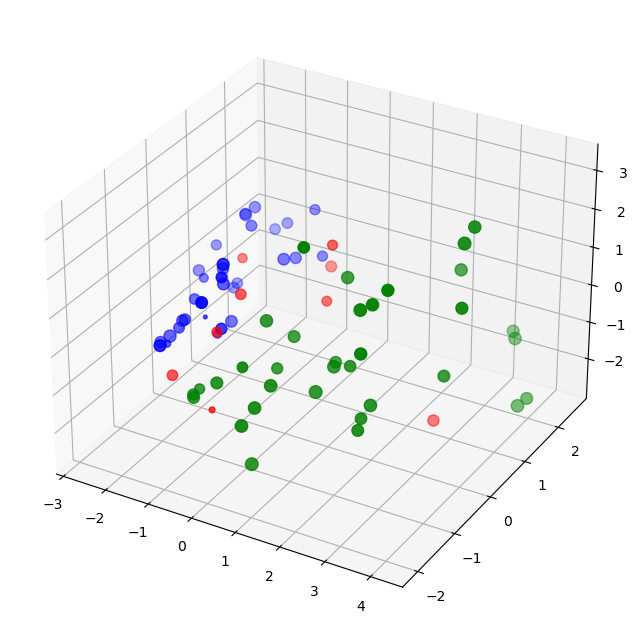

In [18]:

# ~~~~~~~~~~~~~~~~~~~~~~
# 3   Additional attempt 
# ~~~~~~~~~~~~~~~~~~~~~~

# The same as above, but accept all candy

#
# !!!This part contains non optimal code!!!
#

# Reload data 

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent', 'pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=df_data['size'], lw=1, label="candy",c=df_data['color']) 
# ax.legend()
plt.show()

df_data['x'] = X_reduce[:,0]
df_data['y'] = X_reduce[:,1]
df_data['z'] = X_reduce[:,2]

model = []

all_candy = df_data.index
comb = combinations(all_candy, 3)

for candy in comb:

    a=df_data.loc[candy[0]]
    b=df_data.loc[candy[1]]
    c=df_data.loc[candy[2]]
        
    area = areatriangle3d (a['x'],a['y'],a['z'],b['x'],b['y'],b['z'],c['x'],c['y'],c['z'])  
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_x'    : a['x'] ,
            '1_y'    : a['y'] ,
            '1_z'    : a['z'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_x'    : b['x'] ,
            '2_y'    : b['y'] ,
            '2_z'    : b['z'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_x'    : c['x'] ,
            '3_y'    : c['y'] ,
            '3_z'    : c['z'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)

# All candy in one graph:
# a lot of candy on the same xyz position


In [19]:
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(15)


,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
90360,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,172.193722,17.925363
15594,Baby Ruth,chocolate,56.914547,Smarties candy,fruity,45.995827,Whoppers,chocolate,49.524113,152.434487,17.907201
90635,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,Whoppers,chocolate,49.524113,160.776886,17.767629
15699,Baby Ruth,chocolate,56.914547,Strawberry bon bons,fruity,34.578991,Whoppers,chocolate,49.524113,141.017651,17.726202
3090,100 Grand,chocolate,66.971725,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,189.641334,17.615849
14373,Baby Ruth,chocolate,56.914547,Lemonhead,fruity,39.141056,Whoppers,chocolate,49.524113,145.579716,17.400491
3115,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,178.224498,17.392321
954,100 Grand,chocolate,66.971725,Fruit Chews,fruity,43.088924,Snickers,chocolate,76.673782,186.734431,17.389619
66886,Lemonhead,fruity,39.141056,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,165.338951,17.325629
3112,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Sour Patch Kids,fruity,59.863998,203.509505,17.268748


In [20]:

# The prevous solution has Many the same values.
# A lot of candy is the same based on the 3 attributes

# create a list of the best candy grouped by x, y, and z
# easy in SQL for an Oracle user (a beginner in dataframes).

# df_data [['x','y','z','winpercent']].sort_values(by=['x','y','z'], ascending=False).head (10)

df_temp = df_data [['x','y','z','winpercent','type']].sort_values(by=['x','y','z'], ascending=False)

df_temp['x']=round(df_temp['x']*1)/1
df_temp['y']=round(df_temp['y']*1)/1
df_temp['z']=round(df_temp['z']*1)/1

df_temp['competitorname'] = df_temp.index

df_temp.sort_values(by=['x','y','z'], ascending=False)

df_grouped = pd.DataFrame(df_temp.groupby(['x','y','z'], sort='winpercent')[['winpercent','type','competitorname']].max())

df_grouped = df_grouped.reset_index()

df_grouped = df_grouped.rename(columns={'x': 'xr', 'y': 'yr', 'z': 'zr'})

df_candylist=df_grouped.set_index('competitorname')

df_candylist

# this is a reduced list of the best candy


,xr,yr,zr,winpercent,type
competitorname,,,,,
Strawberry bon bons,-3.0,1.0,0.0,45.995827,fruity
Starburst,-2.0,-1.0,-1.0,67.037628,fruity
Welch's Fruit Snacks,-2.0,-1.0,0.0,47.173229,fruity
Twizzlers,-2.0,-0.0,-1.0,45.466282,fruity
Red vines,-2.0,-0.0,0.0,57.119740,fruity
Skittles wildberry,-2.0,-0.0,1.0,63.085140,fruity
Warheads,-2.0,1.0,-1.0,39.141056,fruity
Root Beer Barrels,-2.0,1.0,0.0,29.703691,other
Runts,-2.0,1.0,1.0,55.354046,fruity


In [21]:

# Yes, a decent join

df_reduced = pd.concat([df_data, df_candylist], axis=1, join="inner")
df_reduced = df_reduced.rename(columns={'x': 'xf', 'y': 'yf', 'z': 'zf'})
df_reduced = df_reduced.rename(columns={'xr': 'x', 'yr': 'y', 'zr': 'z'})
df_reduced  [['type','x','y','z','type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].head(15)


,type,type,x,y,z,type,type,winpercent,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,,,,,,,,
100 Grand,chocolate,chocolate,4.0,1.0,3.0,chocolate,chocolate,66.971725,66.971725,1,0,1,0,0,1,0,1,0
Air Heads,fruity,fruity,-1.0,1.0,1.0,fruity,fruity,52.341465,52.341465,0,1,0,0,0,0,0,0,0
Boston Baked Beans,other,other,0.0,-2.0,-1.0,other,other,23.417824,23.417824,0,0,0,1,0,0,0,0,1
Charleston Chew,chocolate,chocolate,3.0,1.0,-2.0,chocolate,chocolate,38.975037,67.602936,1,0,0,0,1,0,0,1,0
Fun Dip,fruity,fruity,-2.0,2.0,0.0,fruity,fruity,39.185505,39.460556,0,1,0,0,0,0,1,0,0
Gobstopper,fruity,fruity,-2.0,2.0,1.0,fruity,fruity,46.783348,46.783348,0,1,0,0,0,0,1,0,1
Hershey's Special Dark,chocolate,chocolate,2.0,-0.0,0.0,chocolate,chocolate,59.236122,59.236122,1,0,0,0,0,0,0,1,0
Junior Mints,chocolate,chocolate,0.0,-2.0,0.0,chocolate,chocolate,57.219250,57.219250,1,0,0,0,0,0,0,0,1
Kit Kat,chocolate,chocolate,2.0,-1.0,2.0,chocolate,chocolate,76.768600,76.768600,1,0,0,0,0,1,0,1,0


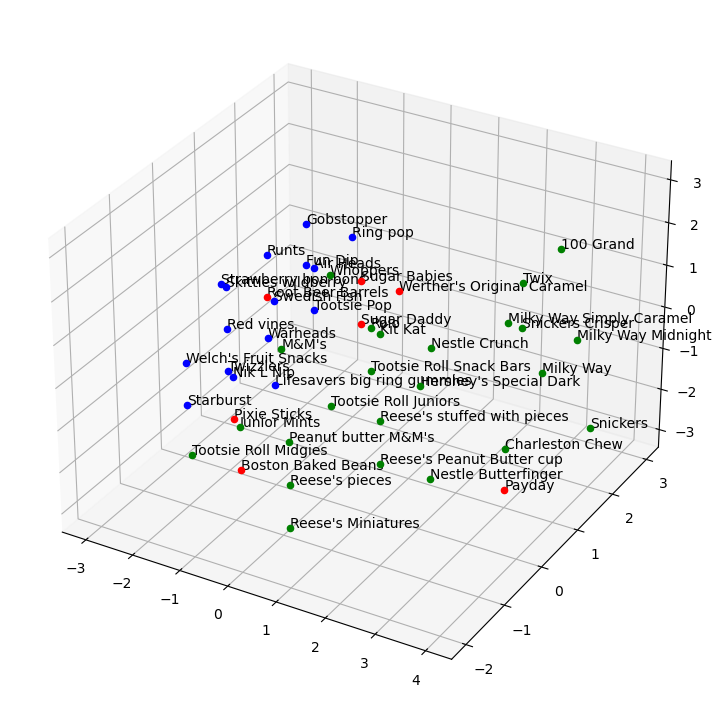

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,...,color,size,xf,yf,zf,x,y,z,winpercent,type
competitorname,,,,,,,,,,,,,,,,,,,,,
Payday,0,0,0,1,1,0,0,1,0,0.465,...,r,64.613398,2.651371,0.945568,-2.661264,3.0,1.0,-3.0,46.296597,other


In [22]:

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')

for ia, a in df_reduced.iterrows():
    labelname = ia
    color = a['color']
    x = a['x']
    y = a['y']
    z = a['z']
    ax.scatter(x, y, z, label=labelname, c=color )  # this way you can control color/marker/size of each group freely
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')
    
plt.show()


# other     = red
# chocolate = green
# fruity    = blue

# there is one red which looks off track?

df_reduced.loc[(df_data['type'] == 'other') & (df_data['x'] > 2)] 
# this is 'Payday': it's peanutalmondy and nougat


In [ ]:
#from mpl_toolkits.mplot3d import axes3d
#import matplotlib.pyplot as plt
#from numpy.random import rand
#from IPython.display import HTML
#from matplotlib import animation

#def animate(frame):
#  ax.view_init(30, frame/4)
#  plt.pause(.001)
#  return fig

#anim = animation.FuncAnimation(fig, animate, frames=300, interval=50)
#HTML(anim.to_html5_video())

In [23]:

# Calculate all triangles

model = []

all_candy = df_reduced.index
comb = combinations(all_candy, 3)

for candy in comb:

    a=df_data.loc[candy[0]]
    b=df_data.loc[candy[1]]
    c=df_data.loc[candy[2]]
        
    area = areatriangle3d (a['x'],a['y'],a['z'],b['x'],b['y'],b['z'],c['x'],c['y'],c['z'])  
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_x'    : a['x'] ,
            '1_y'    : a['y'] ,
            '1_z'    : a['z'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_x'    : b['x'] ,
            '2_y'    : b['y'] ,
            '2_z'    : b['z'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_x'    : c['x'] ,
            '3_y'    : c['y'] ,
            '3_z'    : c['z'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)


In [24]:
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(15)


,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
15576,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,Whoppers,chocolate,49.524113,160.776886,17.767629
901,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,178.224498,17.392321
15651,Snickers,chocolate,76.673782,Warheads,fruity,39.011898,Whoppers,chocolate,49.524113,165.209793,17.186377
15571,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,Twix,chocolate,81.642914,192.895687,16.864510
900,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Starburst,fruity,67.037628,210.683135,16.724601
15278,Runts,fruity,42.849144,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,169.047039,16.483410
865,100 Grand,chocolate,66.971725,Runts,fruity,42.849144,Snickers,chocolate,76.673782,186.494651,16.300705
911,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Warheads,fruity,39.011898,182.657405,16.282090
643,100 Grand,chocolate,66.971725,Payday,other,46.296597,Strawberry bon bons,fruity,34.578991,147.847313,16.135483
15558,Snickers,chocolate,76.673782,Starburst,fruity,67.037628,Twix,chocolate,81.642914,225.354324,16.095389


In [25]:
# first solution:

df_triangle=df_data.loc[['Payday','Starburst','Reese\'s Peanut Butter cup']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
area = areatriangle3d(df_triangle.iloc[0]['x'],df_triangle.iloc[0]['y'],df_triangle.iloc[0]['z'],df_triangle.iloc[1]['x'],df_triangle.iloc[1]['y'],df_triangle.iloc[1]['z'],df_triangle.iloc[2]['x'],df_triangle.iloc[2]['y'],df_triangle.iloc[2]['z'])
print (area)
df_triangle


5.233269170766634


,type,x,y,z,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,,,,
Payday,other,2.651371,0.945568,-2.661264,46.296597,0,0,0,1,1,0,0,1,0
Starburst,fruity,-2.014128,-0.724737,-0.508889,67.037628,0,1,0,0,0,0,0,0,1
Reese's Peanut Butter cup,chocolate,1.567661,-0.975374,-0.527955,84.180290,1,0,0,1,0,0,0,0,0


In [26]:
# Second solution

df_triangle=df_data.loc[['Reese\'s Peanut Butter cup','Twix','Starburst']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
area = areatriangle3d(df_triangle.iloc[0]['x'],df_triangle.iloc[0]['y'],df_triangle.iloc[0]['z'],df_triangle.iloc[1]['x'],df_triangle.iloc[1]['y'],df_triangle.iloc[1]['z'],df_triangle.iloc[2]['x'],df_triangle.iloc[2]['y'],df_triangle.iloc[2]['z'])
print (area)
df_triangle


6.501156453478747


,type,x,y,z,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,chocolate,1.567661,-0.975374,-0.527955,84.180290,1,0,0,1,0,0,0,0,0
Twix,chocolate,3.621579,0.479738,2.712804,81.642914,1,0,1,0,0,1,0,1,0
Starburst,fruity,-2.014128,-0.724737,-0.508889,67.037628,0,1,0,0,0,0,0,0,1


In [27]:
# third solution

df_triangle=df_data.loc[['Smarties candy','Snickers','Whoppers']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
area = areatriangle3d(df_triangle.iloc[0]['x'],df_triangle.iloc[0]['y'],df_triangle.iloc[0]['z'],df_triangle.iloc[1]['x'],df_triangle.iloc[1]['y'],df_triangle.iloc[1]['z'],df_triangle.iloc[2]['x'],df_triangle.iloc[2]['y'],df_triangle.iloc[2]['z'])
print (area)
df_triangle


17.925362689027224


,type,x,y,z,winpercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
competitorname,,,,,,,,,,,,,,
Smarties candy,fruity,-2.663866,0.715399,-0.189080,45.995827,0,1,0,0,0,0,1,0,1
Snickers,chocolate,4.033350,1.620751,-2.388554,76.673782,1,0,1,1,1,0,0,1,0
Whoppers,chocolate,1.448317,-1.130209,3.242461,49.524113,1,0,0,0,0,1,0,0,1


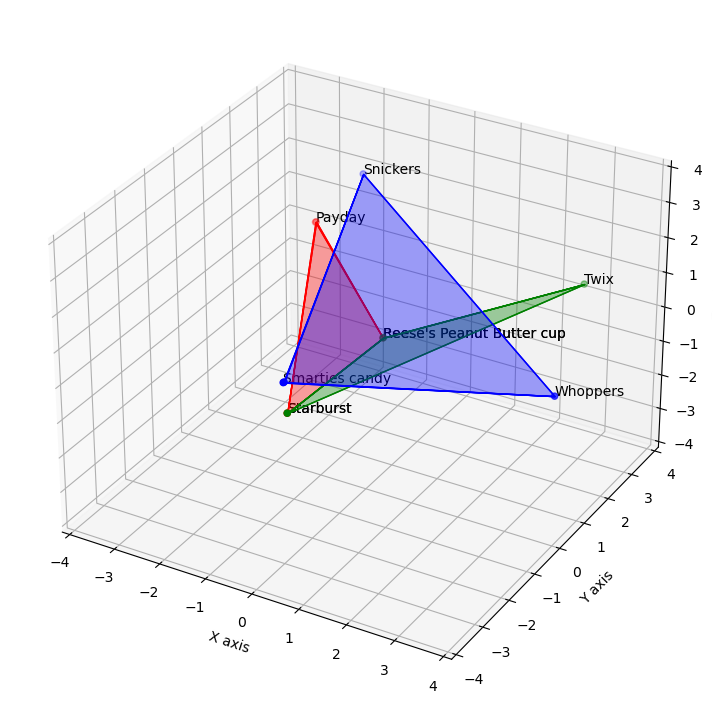

In [28]:

# make 3 triangles in a 3d space

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
import math

df_triangle1=df_data.loc[['Payday','Starburst','Reese\'s Peanut Butter cup']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle2=df_data.loc[['Reese\'s Peanut Butter cup','Twix','Starburst']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle3=df_data.loc[['Smarties candy','Snickers','Whoppers']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

# rotate
xp='z'
yp='x'
zp='y'

vertices1 = np.array([
        [df_triangle1.iloc[0][xp]     ,df_triangle1.iloc[0][yp]     ,df_triangle1.iloc[0][zp]],
        [df_triangle1.iloc[1][xp]     ,df_triangle1.iloc[1][yp]     ,df_triangle1.iloc[1][zp]],
        [df_triangle1.iloc[2][xp]     ,df_triangle1.iloc[2][yp]     ,df_triangle1.iloc[2][zp]],
        [df_triangle1.iloc[0][xp]+0.01,df_triangle1.iloc[0][yp]+0.01,df_triangle1.iloc[0][zp]+0.01] 
        ])

vertices2 = np.array([
        [df_triangle2.iloc[0][xp]     ,df_triangle2.iloc[0][yp]     ,df_triangle2.iloc[0][zp]],
        [df_triangle2.iloc[1][xp]     ,df_triangle2.iloc[1][yp]     ,df_triangle2.iloc[1][zp]],
        [df_triangle2.iloc[2][xp]     ,df_triangle2.iloc[2][yp]     ,df_triangle2.iloc[2][zp]],
        [df_triangle2.iloc[0][xp]+0.01,df_triangle2.iloc[0][yp]+0.01,df_triangle2.iloc[0][zp]+0.01] 
        ])

vertices3 = np.array([
        [df_triangle3.iloc[0][xp]     ,df_triangle3.iloc[0][yp]     ,df_triangle3.iloc[0][zp]],
        [df_triangle3.iloc[1][xp]     ,df_triangle3.iloc[1][yp]     ,df_triangle3.iloc[1][zp]],
        [df_triangle3.iloc[2][xp]     ,df_triangle3.iloc[2][yp]     ,df_triangle3.iloc[2][zp]],
        [df_triangle3.iloc[0][xp]+0.01,df_triangle3.iloc[0][yp]+0.01,df_triangle3.iloc[0][zp]+0.01] 
        ])

hull1 = ConvexHull(vertices1)
hull2 = ConvexHull(vertices2)
hull3 = ConvexHull(vertices3)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices1[:, 0], vertices1[:, 1], vertices1[:, 2], color='r')
for simplex in hull1.simplices:
    tri = Poly3DCollection([vertices1[simplex]], color='red', edgecolor='r', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices2[:, 0], vertices2[:, 1], vertices2[:, 2], color='g')
for simplex in hull2.simplices:
    tri = Poly3DCollection([vertices2[simplex]], color='green', edgecolor='g', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices3[:, 0], vertices3[:, 1], vertices3[:, 2], color='b')
for simplex in hull3.simplices:
    tri = Poly3DCollection([vertices3[simplex]], color='blue', edgecolor='b', alpha=0.2)
    ax.add_collection3d(tri)

for ia, a in df_triangle1.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle2.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle3.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')
    
         
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()
         


In [ ]:
''' 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

def animate(frame):
  ax.view_init(30, frame/2)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=720, interval=50)

with open("myvideo.html", "w") as f:
    print(anim.to_html5_video(), file=f)

HTML(anim.to_html5_video())
'''

In [30]:

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 4D model (experimental)
#
# Warning: non optimal code in this part !!!
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Reload data 

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=4)  
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

df_data['p0'] = X_reduce[:,0]
df_data['p1'] = X_reduce[:,1]
df_data['p2'] = X_reduce[:,2]
df_data['p3'] = X_reduce[:,3]

def areatriangle4d (x1,y1,z1,t1,x2,y2,z2,t2,x3,y3,z3,t3):
    a = (abs(x2-x3)**2) + (abs(y2-y3)**2) + (abs(z2-z3)**2) + (abs(t2-t3)**2)
    b = (abs(x1-x3)**2) + (abs(y1-y3)**2) + (abs(z1-z3)**2) + (abs(t1-t3)**2)
    c = (abs(x1-x2)**2) + (abs(y1-y2)**2) + (abs(z1-z2)**2) + (abs(t1-t2)**2)
    d= 4*a*b-abs(c-a-b)**2
    e= d/16
    f= math.sqrt(abs(e))
    return f
    
df_temp = df_data [['p0','p1','p2','p3','winpercent','type']].sort_values(by=['p0','p1','p2','p3'], ascending=False)

# reduce
df_temp['p0']=round(df_temp['p0']*4)/4
df_temp['p1']=round(df_temp['p1']*4)/4
df_temp['p2']=round(df_temp['p2']*4)/4
df_temp['p3']=round(df_temp['p3']*4)/4

df_temp['competitorname'] = df_temp.index
df_temp.sort_values(by=['p0','p1','p2','p3'], ascending=False)
df_grouped = pd.DataFrame(df_temp.groupby(['p0','p1','p2','p3'], sort='winpercent')[['winpercent','type','competitorname']].max())
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'p0': 'p0r', 'p1': 'p1r', 'p2': 'p2r', 'p3': 'p3r'})

df_candylist=df_grouped.set_index('competitorname')

df_reduced = pd.concat([df_data, df_candylist], axis=1, join="inner")
df_reduced = df_reduced.rename(columns={'p0': 'p0f', 'p1': 'p1f', 'p2': 'p2f', 'p3': 'p3f'})
df_reduced = df_reduced.rename(columns={'p0r': 'p0', 'p1r': 'p1', 'p2r': 'p2', 'p3r': 'p3'})
df_reduced  [['type','p0','p1','p2','p3','type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

model = []

all_candy = df_reduced.index
comb = combinations(all_candy, 3)

maxarea=0

for candy in comb:

    a=df_data.loc[candy[0]]
    b=df_data.loc[candy[1]]
    c=df_data.loc[candy[2]]
        
    area = areatriangle4d (a['p0'],a['p1'],a['p2'],a['p3'],b['p0'],b['p1'],b['p2'],b['p3'],c['p0'],c['p1'],c['p2'],c['p3']) 
    if area > maxarea:
        maxarea = area
        print (maxarea)
        
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_p0'    : a['p0'] ,
            '1_p1'    : a['p1'] ,
            '1_p2'    : a['p2'] ,
            '1_p3'    : a['p3'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_p0'    : b['p0'] ,
            '2_p1'    : b['p1'] ,
            '2_p2'    : b['p2'] ,
            '2_p3'    : b['p3'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_p0'    : c['p0'] ,
            '3_p1'    : c['p1'] ,
            '3_p2'    : c['p2'] ,
            '3_p3'    : c['p3'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)

# All candy in one graph:
# a lot of candy on the same xyz position

print ('DONE')

9.132834960447875
13.538501541408127
13.571290408801849
14.886045122683374
17.877211001330362
18.709772113422947
18.81240353611773
19.51877987397896
DONE


In [31]:
df_data[['winpercent','p0','p1','p2','p3']]

,winpercent,p0,p1,p2,p3
competitorname,,,,,
100 Grand,66.971725,3.634322,0.739247,2.919970,1.217805
3 Musketeers,67.602936,2.579985,1.315108,-1.812482,0.245140
Air Heads,52.341465,-0.804576,0.903644,0.551037,-0.616429
Almond Joy,50.347546,2.584831,-0.980490,-0.858339,-0.324958
Baby Ruth,56.914547,4.193525,1.676739,-2.182298,-1.020745
...,...,...,...,...,...
Twizzlers,45.466282,-1.528248,0.054546,-0.826688,1.365085
Warheads,39.011898,-2.142021,1.147247,-0.729819,1.840791
Welch's Fruit Snacks,44.375519,-1.843568,-0.524167,-0.183841,0.167991


In [32]:
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(10)

,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
8298,Baby Ruth,chocolate,56.914547,Lemonhead,fruity,39.141056,Whoppers,chocolate,49.524113,145.579716,19.518780
39868,Lemonhead,fruity,39.141056,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,165.338951,19.315696
9520,Baby Ruth,chocolate,56.914547,Warheads,fruity,39.011898,Whoppers,chocolate,49.524113,145.450558,19.206584
58667,Snickers,chocolate,76.673782,Warheads,fruity,39.011898,Whoppers,chocolate,49.524113,165.209793,19.009059
9328,Baby Ruth,chocolate,56.914547,Smarties candy,fruity,45.995827,Twix,chocolate,81.642914,184.553288,18.823422
186,100 Grand,chocolate,66.971725,Baby Ruth,chocolate,56.914547,Smarties candy,fruity,45.995827,169.882099,18.812404
2275,100 Grand,chocolate,66.971725,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,189.641334,18.808483
58323,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,204.312523,18.747707
146,100 Grand,chocolate,66.971725,Baby Ruth,chocolate,56.914547,Fruit Chews,fruity,43.088924,166.975196,18.709772
9413,Baby Ruth,chocolate,56.914547,Strawberry bon bons,fruity,34.578991,Twix,chocolate,81.642914,173.136452,18.652832


In [33]:
#
# Reload for next experiment
#

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

#84 - max 
#22 - min 



In [34]:

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 3D model with winpercent as 4th variable (experimental)
#
# N=3 (not 4)
#
# Warning: non optimal code in this part !!!
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Reload data 

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=3)  
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

df_data['p0'] = X_reduce[:,0]
df_data['p1'] = X_reduce[:,1]
df_data['p2'] = X_reduce[:,2]
df_data['p3'] = df_data[['winpercent']]/20

def areatriangle4d (x1,y1,z1,t1,x2,y2,z2,t2,x3,y3,z3,t3):
    a = (abs(x2-x3)**2) + (abs(y2-y3)**2) + (abs(z2-z3)**2) + (abs(t2-t3)**2)
    b = (abs(x1-x3)**2) + (abs(y1-y3)**2) + (abs(z1-z3)**2) + (abs(t1-t3)**2)
    c = (abs(x1-x2)**2) + (abs(y1-y2)**2) + (abs(z1-z2)**2) + (abs(t1-t2)**2)
    d= 4*a*b-abs(c-a-b)**2
    e= d/16
    f= math.sqrt(abs(e))
    return f
    
df_temp = df_data [['p0','p1','p2','p3','winpercent','type']].sort_values(by=['p0','p1','p2','p3'], ascending=False)

# reduce
df_temp['p0']=round(df_temp['p0']*4)/4
df_temp['p1']=round(df_temp['p1']*4)/4
df_temp['p2']=round(df_temp['p2']*4)/4
df_temp['p3']=round(df_temp['p3']*4)/4

df_temp['competitorname'] = df_temp.index
df_temp.sort_values(by=['p0','p1','p2','p3'], ascending=False)
df_grouped = pd.DataFrame(df_temp.groupby(['p0','p1','p2','p3'], sort='winpercent')[['winpercent','type','competitorname']].max())
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'p0': 'p0r', 'p1': 'p1r', 'p2': 'p2r', 'p3': 'p3r'})

df_candylist=df_grouped.set_index('competitorname')

df_reduced = pd.concat([df_data, df_candylist], axis=1, join="inner")
df_reduced = df_reduced.rename(columns={'p0': 'p0f', 'p1': 'p1f', 'p2': 'p2f', 'p3': 'p3f'})
df_reduced = df_reduced.rename(columns={'p0r': 'p0', 'p1r': 'p1', 'p2r': 'p2', 'p3r': 'p3'})
df_reduced  [['type','p0','p1','p2','p3','type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

model = []

all_candy = df_reduced.index
comb = combinations(all_candy, 3)

maxarea=0

for candy in comb:

    a=df_data.loc[candy[0]]
    b=df_data.loc[candy[1]]
    c=df_data.loc[candy[2]]
        
    area = areatriangle4d (a['p0'],a['p1'],a['p2'],a['p3'],b['p0'],b['p1'],b['p2'],b['p3'],c['p0'],c['p1'],c['p2'],c['p3']) 
    if area > maxarea:
        maxarea = area
        print (maxarea)
        
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_p0'    : a['p0'] ,
            '1_p1'    : a['p1'] ,
            '1_p2'    : a['p2'] ,
            '1_p3'    : a['p3'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_p0'    : b['p0'] ,
            '2_p1'    : b['p1'] ,
            '2_p2'    : b['p2'] ,
            '2_p3'    : b['p3'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_p0'    : c['p0'] ,
            '3_p1'    : c['p1'] ,
            '3_p2'    : c['p2'] ,
            '3_p3'    : c['p3'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)

print ('DONE')

9.514894269750458
11.367339049825697
11.874485213967057
13.621103259081249
13.67820370401352
14.037706257568138
14.380941322136735
14.637783264468915
17.150717337017422
17.33857972458233
17.469805160501974
17.485342309356287
17.899275896100907
18.021688066131198
18.14516248160319
18.387751814440705
18.522214811984654
DONE


In [36]:
df_data[['winpercent','p0','p1','p2','p3']]

,winpercent,p0,p1,p2,p3
competitorname,,,,,
100 Grand,66.971725,3.634322,0.739247,2.919970,3.348586
3 Musketeers,67.602936,2.579985,1.315108,-1.812482,3.380147
Air Heads,52.341465,-0.804576,0.903644,0.551037,2.617073
Almond Joy,50.347546,2.584831,-0.980490,-0.858339,2.517377
Baby Ruth,56.914547,4.193525,1.676739,-2.182298,2.845727
...,...,...,...,...,...
Twizzlers,45.466282,-1.528248,0.054546,-0.826688,2.273314
Warheads,39.011898,-2.142021,1.147247,-0.729819,1.950595
Welch's Fruit Snacks,44.375519,-1.843568,-0.524167,-0.183841,2.218776


In [37]:
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(10)

,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
90635,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,Whoppers,chocolate,49.524113,160.776886,18.522215
90360,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,172.193722,18.387752
3115,100 Grand,chocolate,66.971725,Snickers,chocolate,76.673782,Strawberry bon bons,fruity,34.578991,178.224498,18.145162
66886,Lemonhead,fruity,39.141056,Snickers,chocolate,76.673782,Whoppers,chocolate,49.524113,165.338951,18.056138
3090,100 Grand,chocolate,66.971725,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,189.641334,18.021688
15699,Baby Ruth,chocolate,56.914547,Strawberry bon bons,fruity,34.578991,Whoppers,chocolate,49.524113,141.017651,17.977236
15594,Baby Ruth,chocolate,56.914547,Smarties candy,fruity,45.995827,Whoppers,chocolate,49.524113,152.434487,17.958840
90737,Snickers,chocolate,76.673782,Warheads,fruity,39.011898,Whoppers,chocolate,49.524113,165.209793,17.917783
744,100 Grand,chocolate,66.971725,Chiclets,fruity,24.524988,Snickers,chocolate,76.673782,168.170495,17.899276
954,100 Grand,chocolate,66.971725,Fruit Chews,fruity,43.088924,Snickers,chocolate,76.673782,186.734431,17.897197


In [38]:

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 4D model (experimental)
#
# PCTPERCENT factor:

# df_data['p0']=df_data['p0'] * (df_data['winpercent']/4)
# df_data['p1']=df_data['p1'] * (df_data['winpercent']/4)
# df_data['p2']=df_data['p2'] * (df_data['winpercent']/4)
# df_data['p3']=df_data['p3'] * (df_data['winpercent']/4)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Reload data 

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=4)  
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)

df_data['p0'] = X_reduce[:,0]
df_data['p1'] = X_reduce[:,1]
df_data['p2'] = X_reduce[:,2]
df_data['p3'] = X_reduce[:,3]

# use winpercent (4 directions, give 25% penalty in each direction)

df_data['p0']=df_data['p0'] * (df_data['winpercent']/4)
df_data['p1']=df_data['p1'] * (df_data['winpercent']/4)
df_data['p2']=df_data['p2'] * (df_data['winpercent']/4)
df_data['p3']=df_data['p3'] * (df_data['winpercent']/4)

def areatriangle4d (x1,y1,z1,t1,x2,y2,z2,t2,x3,y3,z3,t3):
    a = (abs(x2-x3)**2) + (abs(y2-y3)**2) + (abs(z2-z3)**2) + (abs(t2-t3)**2)
    b = (abs(x1-x3)**2) + (abs(y1-y3)**2) + (abs(z1-z3)**2) + (abs(t1-t3)**2)
    c = (abs(x1-x2)**2) + (abs(y1-y2)**2) + (abs(z1-z2)**2) + (abs(t1-t2)**2)
    d= 4*a*b-abs(c-a-b)**2
    e= d/16
    f= math.sqrt(abs(e))
    return f
    
df_temp = df_data [['p0','p1','p2','p3','winpercent','type']].sort_values(by=['p0','p1','p2','p3'], ascending=False)



# reduce
df_temp['p0']=round(df_temp['p0']*4)/4
df_temp['p1']=round(df_temp['p1']*4)/4
df_temp['p2']=round(df_temp['p2']*4)/4
df_temp['p3']=round(df_temp['p3']*4)/4

df_temp['competitorname'] = df_temp.index
df_temp.sort_values(by=['p0','p1','p2','p3'], ascending=False)
df_grouped = pd.DataFrame(df_temp.groupby(['p0','p1','p2','p3'], sort='winpercent')[['winpercent','type','competitorname']].max())
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={'p0': 'p0r', 'p1': 'p1r', 'p2': 'p2r', 'p3': 'p3r'})

df_candylist=df_grouped.set_index('competitorname')

df_reduced = pd.concat([df_data, df_candylist], axis=1, join="inner")
df_reduced = df_reduced.rename(columns={'p0': 'p0f', 'p1': 'p1f', 'p2': 'p2f', 'p3': 'p3f'})
df_reduced = df_reduced.rename(columns={'p0r': 'p0', 'p1r': 'p1', 'p2r': 'p2', 'p3r': 'p3'})
df_reduced  [['type','p0','p1','p2','p3','type','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

model = []

all_candy = df_reduced.index
comb = combinations(all_candy, 3)

maxarea=0

for candy in comb:

    a=df_data.loc[candy[0]]
    b=df_data.loc[candy[1]]
    c=df_data.loc[candy[2]]
        
    area = areatriangle4d (a['p0'],a['p1'],a['p2'],a['p3'],b['p0'],b['p1'],b['p2'],b['p3'],c['p0'],c['p1'],c['p2'],c['p3']) 
    if area > maxarea:
        maxarea = area
        print (maxarea)
        
    model.append(
         {  '1_candy': candy[0],
            '1_win'  : a['winpercent'] ,
            '1_type' : a['type'] ,
            '1_p0'    : a['p0'] ,
            '1_p1'    : a['p1'] ,
            '1_p2'    : a['p2'] ,
            '1_p3'    : a['p3'] ,
            '2_candy': candy[1],
            '2_win'  : b['winpercent'],
            '2_type' : b['type'] ,
            '2_p0'    : b['p0'] ,
            '2_p1'    : b['p1'] ,
            '2_p2'    : b['p2'] ,
            '2_p3'    : b['p3'] ,
            '3_candy': candy[2],
            '3_win'  : c['winpercent'] ,
            '3_type' : c['type'] ,
            '3_p0'    : c['p0'] ,
            '3_p1'    : c['p1'] ,
            '3_p2'    : c['p2'] ,
            '3_p3'    : c['p3'] ,
            'totwin' : a['winpercent']  + b['winpercent']  + c['winpercent'] ,
            'area'   :  area})

df_solution = pd.DataFrame(model)

print ('DONE')

2661.4870268287964
2733.2432501549993
2854.6218061506024
2965.6374080857727
3205.9957581329695
3275.3941985868087
3517.436566896869
3586.705747892756
3639.5784134943246
4140.698180272646
4379.500359064668
4403.229884826972
4508.233426304438
4568.741321048633
5076.767370975323
5166.800273480422
5174.963446260124
5587.354297365381
5612.39451331875
5952.230629493287
6184.286869436693
6499.277909074053
6546.614461590758
DONE


In [39]:
df_data[['winpercent','p0','p1','p2','p3']]

,winpercent,p0,p1,p2,p3
competitorname,,,,,
100 Grand,66.971725,60.849200,12.377160,48.888865,20.389623
3 Musketeers,67.602936,43.603642,22.226299,-30.632276,4.143046
Air Heads,52.341465,-10.528168,11.824515,7.210525,-8.066196
Almond Joy,50.347546,32.534980,-12.341312,-10.803817,-4.090206
Baby Ruth,56.914547,59.668149,23.857714,-31.051126,-14.523815
...,...,...,...,...,...
Twizzlers,45.466282,-17.370939,0.620000,-9.396612,15.516333
Warheads,39.011898,-20.891073,11.189072,-7.117911,17.953185
Welch's Fruit Snacks,44.375519,-20.452316,-5.815047,-2.039512,1.863677


In [40]:
df_solution[['1_candy','1_type','1_win','2_candy','2_type','2_win','3_candy','3_type','3_win','totwin','area']].sort_values(by=['area','totwin'], ascending=False).head(10)

,1_candy,1_type,1_win,2_candy,2_type,2_win,3_candy,3_type,3_win,totwin,area
90615,Snickers,chocolate,76.673782,Starburst,fruity,67.037628,Twix,chocolate,81.642914,225.354324,6546.614462
90582,Snickers,chocolate,76.673782,Sour Patch Kids,fruity,59.863998,Twix,chocolate,81.642914,218.180694,6499.277909
90599,Snickers,chocolate,76.673782,Sour Patch Tricksters,fruity,52.825947,Twix,chocolate,81.642914,211.142643,6256.568795
79344,Nerds,fruity,55.354046,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,213.670742,6184.286869
89661,Skittles original,fruity,63.085140,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,221.401836,6143.386834
90355,Smarties candy,fruity,45.995827,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,204.312523,6107.005982
39291,Fruit Chews,fruity,43.088924,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,201.405620,5952.230629
89914,Skittles wildberry,fruity,55.103695,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,213.420391,5923.374347
45925,Haribo Gold Bears,fruity,57.119740,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,215.436436,5852.746962
43780,Gobstopper,fruity,46.783348,Snickers,chocolate,76.673782,Twix,chocolate,81.642914,205.100044,5825.773709


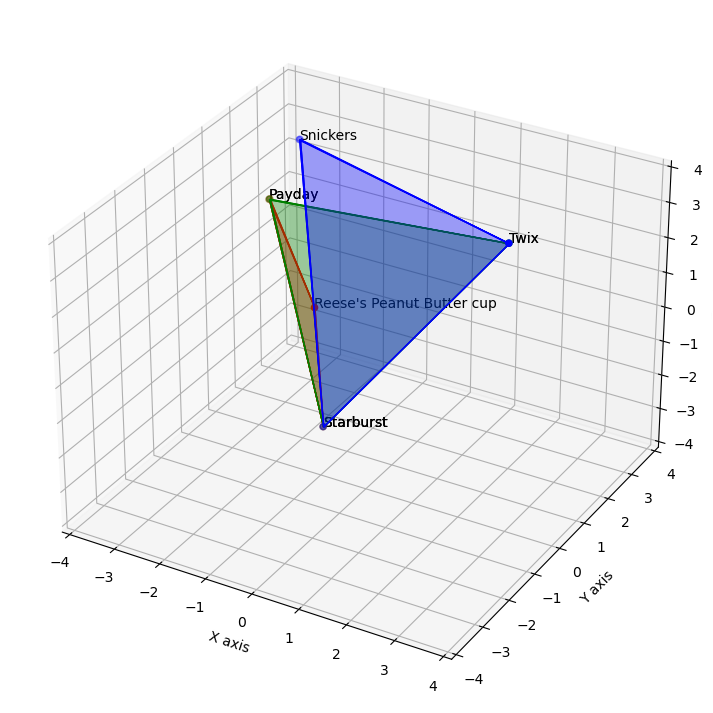

In [41]:

# graph with 3 triangles to display the differences between the candies

''' (red)
top 3 per type of candy:
Payday
Reese's Peanut Butter cup
Starburst

top 5 of each candy (green):
Payday
Starburst
Twix

PCA including winpercent (blue):
Snickers
Twix
Starburst
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
import math


# Reload data and change all attributes to binary values (int datatype) 

df_data = pd.read_csv('candy-data.csv', index_col=0)  
df_data.sort_values(by=['winpercent'], ascending=False).head(15)

df_data.drop("One dime"   ,axis=0,inplace=True)
df_data.drop("One quarter",axis=0,inplace=True)

df_data['type']='other'
df_data.loc[df_data['chocolate'] == 1,'type'] = 'chocolate'
df_data.loc[df_data['fruity'] == 1,'type'] = 'fruity'

# reorder columns
df_data = df_data [['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent','type']]

df_data['color']='r'
df_data.loc[df_data['chocolate'] == 1,'color'] = 'g'
df_data.loc[df_data['fruity'] == 1,'color'] = 'b'

# used for plotting
df_data['size']= np.log ((df_data['winpercent'] - 21) ** 10 ) * 2

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

to_model_columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent', 'pricepercent']

X = scaler.fit_transform(df_data[to_model_columns])
X_reduce = pca.fit_transform(X)


df_data['x'] = X_reduce[:,0]
df_data['y'] = X_reduce[:,1]
df_data['z'] = X_reduce[:,2]


df_triangle1=df_data.loc[['Payday','Starburst','Reese\'s Peanut Butter cup']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle2=df_data.loc[['Payday','Starburst','Twix']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
df_triangle3=df_data.loc[['Snickers','Twix','Starburst']][['type','x','y','z','winpercent','chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]

# rotate for better display
xp='z'
yp='y'
zp='x'

vertices1 = np.array([
        [df_triangle1.iloc[0][xp]     ,df_triangle1.iloc[0][yp]     ,df_triangle1.iloc[0][zp]],
        [df_triangle1.iloc[1][xp]     ,df_triangle1.iloc[1][yp]     ,df_triangle1.iloc[1][zp]],
        [df_triangle1.iloc[2][xp]     ,df_triangle1.iloc[2][yp]     ,df_triangle1.iloc[2][zp]],
        [df_triangle1.iloc[0][xp]+0.01,df_triangle1.iloc[0][yp]+0.01,df_triangle1.iloc[0][zp]+0.01] 
        ])

vertices2 = np.array([
        [df_triangle2.iloc[0][xp]     ,df_triangle2.iloc[0][yp]     ,df_triangle2.iloc[0][zp]],
        [df_triangle2.iloc[1][xp]     ,df_triangle2.iloc[1][yp]     ,df_triangle2.iloc[1][zp]],
        [df_triangle2.iloc[2][xp]     ,df_triangle2.iloc[2][yp]     ,df_triangle2.iloc[2][zp]],
        [df_triangle2.iloc[0][xp]+0.01,df_triangle2.iloc[0][yp]+0.01,df_triangle2.iloc[0][zp]+0.01] 
        ])

vertices3 = np.array([
        [df_triangle3.iloc[0][xp]     ,df_triangle3.iloc[0][yp]     ,df_triangle3.iloc[0][zp]],
        [df_triangle3.iloc[1][xp]     ,df_triangle3.iloc[1][yp]     ,df_triangle3.iloc[1][zp]],
        [df_triangle3.iloc[2][xp]     ,df_triangle3.iloc[2][yp]     ,df_triangle3.iloc[2][zp]],
        [df_triangle3.iloc[0][xp]+0.01,df_triangle3.iloc[0][yp]+0.01,df_triangle3.iloc[0][zp]+0.01] 
        ])

hull1 = ConvexHull(vertices1)
hull2 = ConvexHull(vertices2)
hull3 = ConvexHull(vertices3)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices1[:, 0], vertices1[:, 1], vertices1[:, 2], color='r')
for simplex in hull1.simplices:
    tri = Poly3DCollection([vertices1[simplex]], color='red', edgecolor='r', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices2[:, 0], vertices2[:, 1], vertices2[:, 2], color='g')
for simplex in hull2.simplices:
    tri = Poly3DCollection([vertices2[simplex]], color='green', edgecolor='g', alpha=0.2)
    ax.add_collection3d(tri)

ax.scatter(vertices3[:, 0], vertices3[:, 1], vertices3[:, 2], color='b')
for simplex in hull3.simplices:
    tri = Poly3DCollection([vertices3[simplex]], color='blue', edgecolor='b', alpha=0.2)
    ax.add_collection3d(tri)

for ia, a in df_triangle1.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle2.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')

for ia, a in df_triangle3.iterrows():
    labelname = ia
    x = a[xp]
    y = a[yp]
    z = a[zp]
    ax.text(x, y, z, '%s' % (labelname), size=10, zorder=1, color='k')
    
         
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()
         
fig.savefig('triangles.png', dpi=fig.dpi)
         



In [ ]:
'''
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation

def animate(frame):
  ax.view_init(30, frame/2)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=720, interval=50)

with open("finalvideo.html", "w") as f:
    print(anim.to_html5_video(), file=f)

HTML(anim.to_html5_video())
'''